# LIC Stock Price Movement Prediction
## Scenario 2 – Logistic Regression
Name : Nithin Pranav
**Roll No:** 24BAD080
**Dataset:** LIC Stock Price Data
**Objective:** Predict whether stock price will increase (1) or decrease (0)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)


In [ ]:
df=pd.read_csv("/Users/manojmj/PycharmProjects/machinelearning subject/expno2/Scenario_2_LIC_Stock_Movement/data/lic_stock.csv",low_memory=False)
df.head()


,Date,Open,High,Low,Close
0,Tue May 17 2022 00:00:00 GMT+0530 (India Stand...,872.00,918.95,860.00,875.25
1,Wed May 18 2022 00:00:00 GMT+0530 (India Stand...,885.55,891.00,874.10,876.35
2,Thu May 19 2022 00:00:00 GMT+0530 (India Stand...,867.00,867.00,838.00,840.85
3,Fri May 20 2022 00:00:00 GMT+0530 (India Stand...,848.55,856.80,825.00,826.15
4,Mon May 23 2022 00:00:00 GMT+0530 (India Stand...,826.15,852.70,803.65,816.85


In [ ]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    98 non-null     str    
 1   Open    98 non-null     float64
 2   High    98 non-null     float64
 3   Low     98 non-null     float64
 4   Close   98 non-null     float64
dtypes: float64(4), str(1)
memory usage: 4.0 KB


In [ ]:
df.describe()


,Open,High,Low,Close
count,98.000000,98.000000,98.000000,98.000000
mean,701.538265,708.165306,694.244388,698.081122
std,61.256379,63.310209,58.585598,59.471556
min,620.250000,625.000000,617.000000,619.550000
25%,666.000000,673.025000,659.112500,664.687500
50%,680.950000,687.525000,676.000000,678.400000
75%,707.987500,714.437500,701.437500,706.812500
max,885.550000,918.950000,874.100000,876.350000


In [ ]:
df['Price_Movement'] = np.where(df['Close'] > df['Open'], 1, 0)
df[['Open', 'Close', 'Price_Movement']].head()


,Open,Close,Price_Movement
0,872.00,875.25,1
1,885.55,876.35,0
2,867.00,840.85,0
3,848.55,826.15,0
4,826.15,816.85,0


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Price_Movement'], dtype='str')

In [ ]:
X = df[['Open', 'High', 'Low']]
y = df['Price_Movement']



In [ ]:
X.isnull().sum()




Open    0
High    0
Low     0
dtype: int64

In [ ]:
X = X.fillna(X.median())


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [ ]:
y_pred = model.predict(X_test)



In [ ]:
np.unique(y_test, return_counts=True)
np.unique(y_pred, return_counts=True)

(array([0]), array([20]))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))





Accuracy : 0.3
Precision: 0.1
Recall   : 0.16666666666666666
F1 Score : 0.125


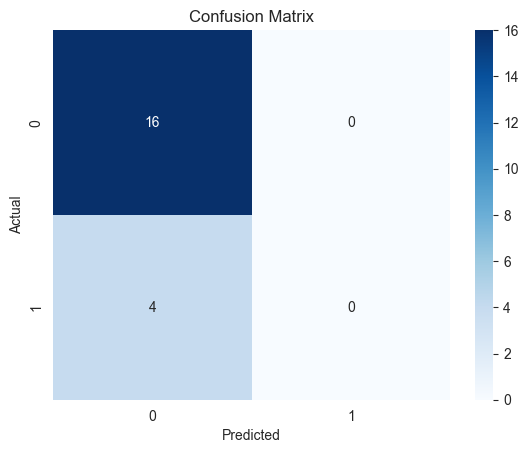

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


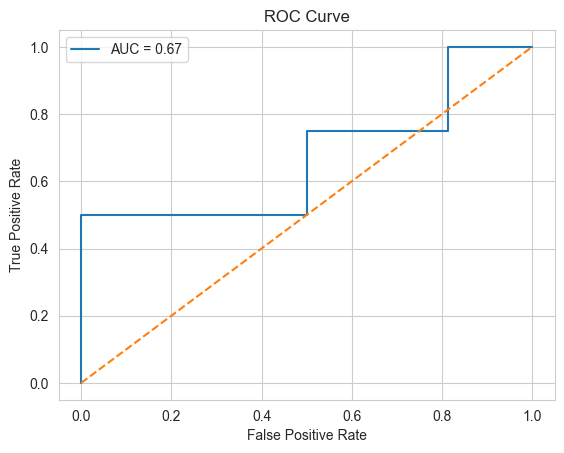

In [ ]:
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
model_l2 = LogisticRegression(
    C=0.5,
    class_weight='balanced'
)
model_l2.fit(X_train, y_train)




,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.5
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

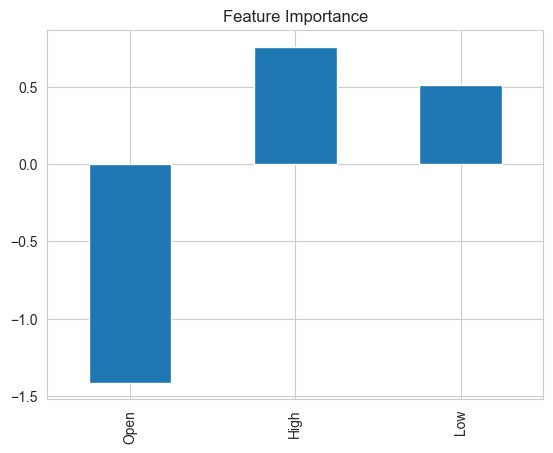

In [ ]:
feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
)

feature_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()
